# Régression avec Python Scikit-Learn

### Import de librairies

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Data Preprocessing

In [19]:
diabetes = datasets.load_diabetes()

Ci-dessous, on affiche la description de notre Dataset

In [20]:
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

Ci-dessous, on utilise une seule caractéristique pour entraîner le modèle de régression

In [21]:
diabetes_X = diabetes.data[:, np.newaxis, 2]

Ci-dessous, on divise notre Dataset de caractéristiques (1 seule dans notre cas) en Train Set et Test Set

In [22]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

Ci-dessous, on divise notre colonne de labels en Train Labels et Test Labels, les caractéristiques et les labels sont dans le même ordre, c'est-à-dire que à un undividu <b>X[i]</b> correspond un label <b>target[i]</b>

In [23]:
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

### Entraînement et évaluation de modèle

On instancie notre modèle de régression linéaire comme objet de la classe <em><b>LinearRegression</b></em> du package <em><b>linear_model</b></em>

In [24]:
regr = linear_model.LinearRegression()

On entraîne notre modèle en utilisant caractéristiques et labels d'apprentissage 

In [25]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

On utilise notre modèle entraîné pour prédire les labes des données de test

In [26]:
diabetes_y_pred = regr.predict(diabetes_X_test)

In [27]:
diabetes_y_pred

array([225.9732401 , 115.74763374, 163.27610621, 114.73638965,
       120.80385422, 158.21988574, 236.08568105, 121.81509832,
        99.56772822, 123.83758651, 204.73711411,  96.53399594,
       154.17490936, 130.91629517,  83.3878227 , 171.36605897,
       137.99500384, 137.99500384, 189.56845268,  84.3990668 ])

Ici on affiche les données de test et notre modèle (ligne) de régression pour voir si elle modèlise bien la relation <caractéristique, label> sur les données de test.
On affiche aussi l'indicateur de performance RMSE calculé sur les données de test

Mean squared error: 2548.07


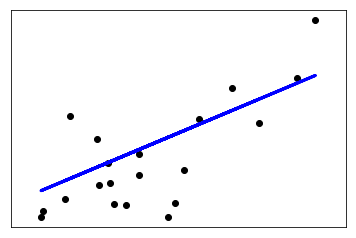

In [28]:

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()